### Продвинутые методы машинного обучения (1 семестр) 
### Индивидуальное задание по модулю «Визуализация данных»
#### **Выполнил:** Алексеев Арсалан Георгиевич

#### **Датасет №4:** Список персонажей DC Comics
https://www.kaggle.com/datasets/arunasivapragasam/dc-comics

#### Описание:
Мы запускаем свою линейку комиксов и нам нужно определить паттерн (набор черт, например: мужчина с голубыми глазами и с засекреченной личностью, но при этом злодей) пяти наиболее популярных (по числу появлений) персонажей.

#### Гипотеза:
Самые популярные персонажи часто похожи и можно из них выделить некие паттерны, на которые можно опираться при создании персонажей.

![DC comics image](https://assets.nationalnewswatch.com/wp-content/uploads/2013/12/superhero.jpg "DC comics image")

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

# python version 3.9.10

1. Проверим качество данных

In [2]:
# Считываем CSV file в pandas DataFrame
dc = pd.read_csv('data/dc-comics.csv')

# Создадим копию для дальнейшей работы
dc_initially = dc.copy()

In [3]:
# Ознакамливаемся с данными
dc.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093.0,"1939, May",1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496.0,"1986, October",1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565.0,"1959, October",1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,1316.0,"1987, February",1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1237.0,"1940, April",1940.0


1.a Проверяем типы данных

In [4]:
# Смотрим общую информацию о данных
dc.info()

# Заметим, что только 3 первых столбца не имеют пропусков
# Тип данных столбца FIRST APPEARANCE - object, нужно преобразование
# Остальные типы данных нормальные и в преобразовании не нуждаются

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6896 entries, 0 to 6895
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           6896 non-null   int64  
 1   name              6896 non-null   object 
 2   urlslug           6896 non-null   object 
 3   ID                4883 non-null   object 
 4   ALIGN             6295 non-null   object 
 5   EYE               3268 non-null   object 
 6   HAIR              4622 non-null   object 
 7   SEX               6771 non-null   object 
 8   ALIVE             6893 non-null   object 
 9   APPEARANCES       6541 non-null   float64
 10  FIRST APPEARANCE  6827 non-null   object 
 11  YEAR              6827 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 646.6+ KB


Мы можем использовать данный столбец FIRST APPEARANCE, для выявления сезонных тенденций.
Для этого выделим Месяц и Год из столбца.

In [5]:
# Удалим строки с пропусками в столбце 'FIRST APPEARANCE', чтобы они не мешали преобразованию
dc.dropna(subset=['FIRST APPEARANCE'], inplace=True)

# Создадим два новых столбца 'YEAR_tp' и'MONTH'
dc[['YEAR_tp','MONTH']] = dc['FIRST APPEARANCE'].str.split(', ', expand=True)

# Создадим копию столбца MONTH
dc_initially['MONTH'] = dc['MONTH']

In [6]:
# Удалим неинформативные стобцы
dc.drop(columns=['page_id', 'urlslug', 'FIRST APPEARANCE', 'YEAR_tp'], inplace=True)

# Столбцы 'page_id', 'urlslug' не несут важную для исследования информацию
# Столбец 'FIRST APPEARANCE' уже не нужен
# Столбец 'YEAR_tp' дублирует столбец YEAR

In [7]:
# Посмотрим на изменения
dc.info()
dc.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6827 entries, 0 to 6886
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         6827 non-null   object 
 1   ID           4842 non-null   object 
 2   ALIGN        6234 non-null   object 
 3   EYE          3252 non-null   object 
 4   HAIR         4584 non-null   object 
 5   SEX          6703 non-null   object 
 6   ALIVE        6824 non-null   object 
 7   APPEARANCES  6481 non-null   float64
 8   YEAR         6827 non-null   float64
 9   MONTH        6683 non-null   object 
dtypes: float64(2), object(8)
memory usage: 844.7+ KB


,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
0,Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093.0,1939.0,May
1,Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496.0,1986.0,October
2,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565.0,1959.0,October
3,James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,1316.0,1987.0,February
4,Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1237.0,1940.0,April


1.b Проверяем наличие пропусков

In [8]:
display(dc.isnull().tail())
cols_null_percent = dc.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

# Изучим более подробно столбцы с пропусками,
# попытаемся понять с чем связаны пропуски

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
6882,False,False,True,False,False,False,False,True,False,False
6883,False,False,False,False,False,False,False,True,False,False
6884,False,False,False,False,False,False,False,True,False,False
6885,False,False,False,False,False,False,False,True,False,False
6886,False,True,True,True,True,False,False,True,False,False


EYE            52.365607
HAIR           32.854841
ID             29.075729
ALIGN           8.686099
APPEARANCES     5.068112
MONTH           2.109272
SEX             1.816318
ALIVE           0.043943
dtype: float64

In [9]:
# Определим столбцы, наличие пропусков в которых может быть обосновано
dc.nunique()
# Наличие пропусках в столбце APPEARANCES, MONTH явно ошибка

# Список названий характеристик персонажа
dc_characteristics = ['ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE']

# Посмотрим для каждого столбца уникальные значения

for column in dc[dc_characteristics]:
    dc_cols_unique_values = dc[column].unique()
    print(f"Column: {column}\nUnique Values: {dc_cols_unique_values}\n")

# Наличие пропусков в столбцах названий характеристик допустимо и возможно объясняется
# особенностями самого персонажа, а не браком в данных, подробнее разберемся ниже

# Заметим также, что в столбце 'EYE' по ошибке попали значения
# из столбца HAIR: 'Auburn Hair'

Column: ID
Unique Values: ['Secret Identity' 'Public Identity' nan 'Identity Unknown']

Column: ALIGN
Unique Values: ['Good Characters' 'Bad Characters' 'Neutral Characters' nan
 'Reformed Criminals']

Column: EYE
Unique Values: ['Blue Eyes' 'Brown Eyes' 'Green Eyes' 'Purple Eyes' 'Black Eyes'
 'White Eyes' 'Red Eyes' 'Photocellular Eyes' 'Hazel Eyes' 'Amber Eyes'
 'Yellow Eyes' nan 'Grey Eyes' 'Pink Eyes' 'Violet Eyes' 'Gold Eyes'
 'Orange Eyes' 'Auburn Hair']

Column: HAIR
Unique Values: ['Black Hair' 'Brown Hair' 'White Hair' 'Blond Hair' 'Red Hair' nan
 'Green Hair' 'Strawberry Blond Hair' 'Grey Hair' 'Silver Hair'
 'Orange Hair' 'Purple Hair' 'Gold Hair' 'Blue Hair' 'Reddish Brown Hair'
 'Pink Hair' 'Violet Hair' 'Platinum Blond Hair']

Column: SEX
Unique Values: ['Male Characters' 'Female Characters' nan 'Genderless Characters'
 'Transgender Characters']

Column: ALIVE
Unique Values: ['Living Characters' 'Deceased Characters' nan]



In [10]:
# Посмотрим на строки, где произошла ошибка со значениями
dc.loc[dc['EYE'] == 'Auburn Hair']

# Действительно произошла ошибка, в столбце 'HAIR' данные отсутствуют

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
872,Marcia King (New Earth),Public Identity,Good Characters,Auburn Hair,NaN,Female Characters,Living Characters,32.0,1984.0,April
1776,"Anthony Angelo, Jr. (New Earth)",Public Identity,Neutral Characters,Auburn Hair,NaN,Male Characters,Living Characters,14.0,1989.0,April
3600,Tawna (New Earth),NaN,Good Characters,Auburn Hair,NaN,Female Characters,Living Characters,5.0,1998.0,April
3623,Razerkut (New Earth),Secret Identity,Bad Characters,Auburn Hair,NaN,Female Characters,Living Characters,5.0,1995.0,August
3627,Carla Draper (New Earth),Public Identity,Bad Characters,Auburn Hair,NaN,Female Characters,Living Characters,5.0,1994.0,November
4070,Madolyn Corbett (New Earth),NaN,Neutral Characters,Auburn Hair,NaN,Female Characters,Deceased Characters,4.0,1995.0,April
5346,Sally Milton (New Earth),Public Identity,NaN,Auburn Hair,NaN,Female Characters,Living Characters,2.0,1988.0,Holiday


In [11]:
# Временно запомним номера ошибочных строк
dc_index_tp = dc[dc['EYE'] == 'Auburn Hair'].index

# Заменим ошибочные ячейки на пропуски
dc.loc[dc_index_tp, ['EYE']] = np.nan
dc.loc[dc_index_tp, ['HAIR']] = 'Auburn Hair'

# Проверим результат замены
dc.loc[dc_index_tp]

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
872,Marcia King (New Earth),Public Identity,Good Characters,NaN,Auburn Hair,Female Characters,Living Characters,32.0,1984.0,April
1776,"Anthony Angelo, Jr. (New Earth)",Public Identity,Neutral Characters,NaN,Auburn Hair,Male Characters,Living Characters,14.0,1989.0,April
3600,Tawna (New Earth),NaN,Good Characters,NaN,Auburn Hair,Female Characters,Living Characters,5.0,1998.0,April
3623,Razerkut (New Earth),Secret Identity,Bad Characters,NaN,Auburn Hair,Female Characters,Living Characters,5.0,1995.0,August
3627,Carla Draper (New Earth),Public Identity,Bad Characters,NaN,Auburn Hair,Female Characters,Living Characters,5.0,1994.0,November
4070,Madolyn Corbett (New Earth),NaN,Neutral Characters,NaN,Auburn Hair,Female Characters,Deceased Characters,4.0,1995.0,April
5346,Sally Milton (New Earth),Public Identity,NaN,NaN,Auburn Hair,Female Characters,Living Characters,2.0,1988.0,Holiday


Так как столбец EYE имеет большое количество пропусков (более 50%) разберемся,
с чем связаны пропуски и насколько критично удаление строк с пропусками.

Как мы видим ниже, у персонажа Susan Dearbon (New Earth) в строке EYE: NaN, но согласно Wiki, данный персонаж и правда ослеп, отбрасывать подобные пропуски мы не будем. Но для сравнения Samuel Morgan (New Earth) имеет пропуск в столбце EYE,
возможно обусловленный старым стилем рисовки (глаза обазначены просто точкой).

In [12]:
cols_null_percent = dc.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)

# посмотрим начиная с какого персонажа возникают пропуски
display(dc.loc[dc['EYE'].isnull()].head())

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
95,Susan Dearbon (New Earth),Public Identity,Good Characters,NaN,Black Hair,Female Characters,Deceased Characters,235.0,1961.0,March
118,James Ewell Brown Stuart (New Earth),Public Identity,Good Characters,NaN,Brown Hair,Male Characters,Deceased Characters,212.0,1961.0,May
122,Wolfgang Winks (New Earth),Public Identity,Good Characters,NaN,Black Hair,Male Characters,Living Characters,206.0,1942.0,November
164,Andre Chavard (New Earth),Public Identity,Good Characters,NaN,Brown Hair,Male Characters,Living Characters,164.0,1942.0,June
181,Samuel Morgan (New Earth),NaN,Good Characters,NaN,Red Hair,Male Characters,Deceased Characters,155.0,1937.0,March


Узнаем какой максимальный год для пропусков в столбце 'EYE'

In [13]:
# Отсортируем данные, узнаем какой максимальный год, когда есть пропуски в EYE
dc[dc['EYE'].isnull()].sort_values(by=['YEAR'], ascending=False).head()

# 2013 год говорит о том, что в данных ошибка, цветные глаза явно появились раньше

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
5539,Springheeled Jack (Prime Earth),Secret Identity,Bad Characters,NaN,NaN,Male Characters,Living Characters,1.0,2013.0,October
5540,Napalm (Prime Earth),Secret Identity,Bad Characters,NaN,NaN,Male Characters,Deceased Characters,1.0,2012.0,June
4324,Ragnar (Green Lantern Animated Series),Public Identity,Bad Characters,NaN,NaN,Male Characters,Living Characters,3.0,2012.0,March
6541,Matteo Bischoff (New Earth),Secret Identity,Bad Characters,NaN,Grey Hair,Male Characters,Living Characters,NaN,2012.0,May
5578,Mister Unknown (New Earth),Secret Identity,Good Characters,NaN,Black Hair,Male Characters,Deceased Characters,1.0,2011.0,January


Узнаем с какого года начинается цветная рисовка глаз

In [14]:
# Отсортируем данные, узнаем какой минимальные год, когда нет пропусков в EYE
dc[dc['EYE'].notnull()].sort_values(by=['YEAR'], ascending=True).head()

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
231,Richard Occult (New Earth),Secret Identity,NaN,Grey Eyes,Black Hair,Male Characters,Living Characters,125.0,1935.0,October
705,Arthur Pendragon (New Earth),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,41.0,1936.0,February
1936,Lady of the Lake (New Earth),NaN,Good Characters,Blue Eyes,Blue Hair,Female Characters,Living Characters,13.0,1936.0,February
321,Merlin (New Earth),Secret Identity,Neutral Characters,Black Eyes,White Hair,Male Characters,Living Characters,92.0,1936.0,February
385,Cyril Saunders (New Earth),Public Identity,Good Characters,Hazel Eyes,White Hair,Male Characters,Living Characters,79.0,1937.0,March


в 1935 у других персонажей уже были цветные глаза, либо описание цвета их глаз добавили позже,
ибо в те года, не всем персонажам давали цветные глаза, или ошибка.
Гипотеза про точечную рисовку глаз не подтвердилась.

In [15]:
# общее количество появлений персонажей с отсутствующими данными в столбце 'EYE'
dc_eye_nan = dc.loc[dc['EYE'].isnull()]['APPEARANCES'].sum()

# процент появления персонажей с отсутствующими данными в столбце 'EYE' от общего суммы появлений 
dc_eye_nan_perc = 100 * dc_eye_nan/dc['APPEARANCES'].sum()

print(f'процент появления персонажей с отсутствующими данными в столбце EYE: {round(dc_eye_nan_perc,2)}')

процент появления персонажей с отсутствующими данными в столбце EYE: 17.27


В итоге, удаление пропусков из столбца 'EYE', приведет к потере большого количества строк, но данный столбец явно содержит пропуски, возможно связанные с особенностями персонажей, нехваткой данных или небрежностью к второстепенным персонажам. Согласно Wiki дефект глаз имеет более 100 персонажей. Совокупно строки с пропусками в столбце EYE имеют 17% от суммарного появления персонажей. Пропуски в строках у не популярных персонажей. Удалив пропуски мы не потеряем основную часть данных.

Рассмотрим другие столбцы с пропусками

In [16]:
display(dc.loc[dc['ID'].isnull()].head())

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
181,Samuel Morgan (New Earth),NaN,Good Characters,NaN,Red Hair,Male Characters,Deceased Characters,155.0,1937.0,March
203,Tubby Watts (New Earth),NaN,Good Characters,NaN,Red Hair,Male Characters,Living Characters,137.0,1941.0,September
220,Victory (New Earth),NaN,Good Characters,Black Eyes,White Hair,Male Characters,Living Characters,130.0,1941.0,September
251,Dolphin (New Earth),NaN,Good Characters,Blue Eyes,Silver Hair,Female Characters,Deceased Characters,115.0,1968.0,December
277,Sugar Plumm (New Earth),NaN,Good Characters,NaN,Blond Hair,Female Characters,Living Characters,105.0,1956.0,May


Пропуски в столбце ID в основном связаны с тем, что в описании не всех персонажей есть информации о том, какая личность скрытая или общественная. Учитывая, что в этом столбце есть также вариант Identity Unknown, то заменим пропуски на это.

In [17]:
display(dc.loc[dc['ALIGN'].isnull()].head())

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
22,Ted Grant (New Earth),Secret Identity,NaN,Blue Eyes,Black Hair,Male Characters,Living Characters,605.0,1942.0,January
27,Ralph Dibny (New Earth),Public Identity,NaN,Blue Eyes,Red Hair,Male Characters,Deceased Characters,558.0,1960.0,May
33,Rex Mason (New Earth),Secret Identity,NaN,Black Eyes,NaN,Male Characters,Living Characters,470.0,1965.0,January
35,Aztar (New Earth),Secret Identity,NaN,White Eyes,NaN,Male Characters,Living Characters,436.0,1940.0,February
36,Theodore Kord (New Earth),Secret Identity,NaN,Blue Eyes,Brown Hair,Male Characters,Deceased Characters,429.0,1986.0,February


Пропуски в данном столбце ALIGN скорее всего несут ошибку, 
ввиду того определить добрый или злой персонаж не является затруднительным.
Согласно wiki для большинства персонажей данный параметр определен,
однако персонажи имеющие пропуски в столбце ALIGN, достаточно популярны и нельзя точно определить как трактовать пропуски, как добрых или злых персонажей, при этом исправившиеся преступники, также были как злыми, так и добрыми. Для дальнейшего анализа обозначим их как Нейтральных, для соблюдения баланса в данных.

In [18]:
display(dc.loc[dc['HAIR'].isnull()].head())

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
18,Raymond Palmer (New Earth),Public Identity,Good Characters,Brown Eyes,NaN,Male Characters,Living Characters,706.0,1961.0,October
19,Alexander Luthor (New Earth),Public Identity,Bad Characters,Green Eyes,NaN,Male Characters,Living Characters,677.0,1986.0,October
31,Franklin Rock (New Earth),Public Identity,Good Characters,Blue Eyes,NaN,Male Characters,Living Characters,492.0,1959.0,April
33,Rex Mason (New Earth),Secret Identity,NaN,Black Eyes,NaN,Male Characters,Living Characters,470.0,1965.0,January
35,Aztar (New Earth),Secret Identity,NaN,White Eyes,NaN,Male Characters,Living Characters,436.0,1940.0,February


пропуски в данной графе HAIR скорее всего связаны с тем, что персонаж либо лысый, 
либо не снимает головной убор/костюм, либо не имеет волос изначально

In [19]:
display(dc.loc[dc['SEX'].isnull()].head())

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
242,Khaji Da (New Earth),Secret Identity,Good Characters,NaN,NaN,NaN,Living Characters,121.0,1964.0,June
343,Rosabelle Mendez (New Earth),Secret Identity,Good Characters,Red Eyes,NaN,NaN,Deceased Characters,86.0,1991.0,February
352,Parallax (New Earth),Secret Identity,Bad Characters,NaN,NaN,NaN,Living Characters,84.0,1994.0,March
514,Chemo (New Earth),Public Identity,Bad Characters,NaN,NaN,NaN,Living Characters,58.0,1962.0,July
628,Ion (New Earth),Secret Identity,Good Characters,Green Eyes,NaN,NaN,Deceased Characters,45.0,2006.0,April


В столбце SEX, уже есть позиция Genderless Characters, для бесполых или тех персонажей, чей пол невозможно определить, поэтому отсутствие данных в этом столбце - ошибка. 

Также заметим, персонажи не имеющие параматеров EYE, HAIR, SEX представляют из себя не человека, 
а какую-то другую форму жизни, поэтому это не является ошибкой, но такие персонажи не представляют ценность,
поэтому удалим строки содержащие от 3 пропусков.

In [20]:
display(dc.loc[dc['ALIVE'].isnull()].head())

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
2726,Hatshephut II (New Earth),Public Identity,Bad Characters,NaN,NaN,Female Characters,NaN,8.0,1992.0,November
3250,Leander (New Earth),Public Identity,Good Characters,NaN,Blue Hair,Male Characters,NaN,6.0,1997.0,January
6854,Mrblonde267\/Buddy Blank (New Earth),NaN,NaN,NaN,NaN,NaN,NaN,NaN,1974.0,October


Персонажей чья судьба неизвестна не так много, поэтому пропуски в столбце ALIVE, будем считать ошибкой, удаляя пропуски и предполагать, что персонаж по умолчанию либо мертв, либо жив.

Резюмируем, наши действия относительно пропусков.

* EYE            (52.36% пропусков)  __Удаляем пропуски__
* HAIR           (32.85% пропусков)  __Заменяем на Unknown__
* ID             (29.07% пропусков)  __Объединяем с Identity Unknown__
* ALIGN           (8.68% пропусков)  __Объединяем пропуски, Reformed Criminals, Neutral Characters__
* APPEARANCES     (5.06% пропусков)  __Удаляем пропуски__
* MONTH           (2.10% пропусков)  __Удаляем пропуски__
* SEX             (1.81% пропусков)  __Удаляем пропуски__
* ALIVE           (0.04% пропусков)  __Удаляем пропуски__

Сначала отбрасываем строки с числом пропусков от 2 и более, так как данные строки заполнены неверно или неинформативно.
Строки, содержащие 1 пропуск скорее всего имеют его, в виду особенностей персонажа, на паре примеров мы это проверили. Безусловно, были персонажи, которые имели 2 пропуска из-за особенностей персонажа, но большая часть строк с 2 пропусками - это ошибки.

In [21]:
m = dc.shape[1] #число столбцов
dc = dc.dropna(axis=0,thresh=m-2)

#выводим долю пропусков после преобразования
print(f'Результирующее число строк ДО: {dc_initially.shape[0]}')
print(f'Результирующее число строк ПОСЛЕ: {dc.shape[0]}')
display(dc.isnull().mean())

Результирующее число строк ДО: 6896
Результирующее число строк ПОСЛЕ: 5686


name           0.000000
ID             0.177278
ALIGN          0.053641
EYE            0.434400
HAIR           0.217728
SEX            0.002990
ALIVE          0.000176
APPEARANCES    0.030953
YEAR           0.000000
MONTH          0.015125
dtype: float64

Теперь удалим строки с пропусками в столбцах:
APPEARANCES, SEX, EYE, ALIVE, MONTH

In [22]:
# Удалим строки содержащие пропуски в столбцах 'APPEARANCES', 'SEX', 'EYE', 'ALIVE', 'MONTH'
# Наличие пропусков в этих столбцах является ошибкой
dc.dropna(subset=['APPEARANCES','SEX', 'EYE', 'ALIVE','MONTH'], inplace=True)

#выводим долю пропусков после преобразования
print(f'Результирующее число строк ДО: {dc_initially.shape[0]}')
print(f'Результирующее число строк ПОСЛЕ: {dc.shape[0]}')
display(dc.isnull().mean())

Результирующее число строк ДО: 6896
Результирующее число строк ПОСЛЕ: 3006


name           0.000000
ID             0.147372
ALIGN          0.070526
EYE            0.000000
HAIR           0.149035
SEX            0.000000
ALIVE          0.000000
APPEARANCES    0.000000
YEAR           0.000000
MONTH          0.000000
dtype: float64

Объединяем и заменяем пропуски в столбцах:

* Столбец ID

In [23]:
# Заменим оставшиеся пропуски на 'Unknown'
dc['ID'].fillna('Unknown', inplace=True)

# В столбце ID есть строки Identity Unknown, заменим их также на Unknown
dc['ID'] = dc['ID'].replace('Identity Unknown', 'Unknown')

#выводим долю пропусков после преобразования
print(f'Результирующее число строк ДО: {dc_initially.shape[0]}')
print(f'Результирующее число строк ПОСЛЕ: {dc.shape[0]}')
display(dc.isnull().mean())

Результирующее число строк ДО: 6896
Результирующее число строк ПОСЛЕ: 3006


name           0.000000
ID             0.000000
ALIGN          0.070526
EYE            0.000000
HAIR           0.149035
SEX            0.000000
ALIVE          0.000000
APPEARANCES    0.000000
YEAR           0.000000
MONTH          0.000000
dtype: float64

* Столбец ALIGN

In [24]:
# Заменим оставшиеся пропуски на 'Unknown'
dc['ALIGN'].fillna('Neutral Characters', inplace=True)

# В столбце ID есть строки Identity Unknown, заменим их также на Unknown
dc['ALIGN'] = dc['ALIGN'].replace('Reformed Criminals', 'Neutral Characters')

#выводим долю пропусков после преобразования
print(f'Результирующее число строк ДО: {dc_initially.shape[0]}')
print(f'Результирующее число строк ПОСЛЕ: {dc.shape[0]}')
display(dc.isnull().mean())

Результирующее число строк ДО: 6896
Результирующее число строк ПОСЛЕ: 3006


name           0.000000
ID             0.000000
ALIGN          0.000000
EYE            0.000000
HAIR           0.149035
SEX            0.000000
ALIVE          0.000000
APPEARANCES    0.000000
YEAR           0.000000
MONTH          0.000000
dtype: float64

* Столбец HAIR

In [25]:
# Заменим оставшиеся пропуски на 'Unknown'
dc['HAIR'].fillna('Unknown', inplace=True)

#выводим долю пропусков после преобразования
print(f'Результирующее число строк ДО: {dc_initially.shape[0]}')
print(f'Результирующее число строк ПОСЛЕ: {dc.shape[0]}')
display(dc.isnull().mean())

Результирующее число строк ДО: 6896
Результирующее число строк ПОСЛЕ: 3006


name           0.0
ID             0.0
ALIGN          0.0
EYE            0.0
HAIR           0.0
SEX            0.0
ALIVE          0.0
APPEARANCES    0.0
YEAR           0.0
MONTH          0.0
dtype: float64

Посмотрим на столбец MONTH

In [26]:
# Посмотрим какие уникальные значения
dc['MONTH'].unique()

array(['May', 'October', 'February', 'April', 'December', 'November',
       'August', 'July', 'January', 'June', 'March', 'September'],
      dtype=object)

In [27]:
# Сравним с изначальными значениями
dc_initially['MONTH'].unique()

array(['May', 'October', 'February', 'April', 'December', 'November',
       'August', 'July', 'January', 'June', 'March', 'September', None,
       nan, 'Holiday'], dtype=object)

Заметим, что в ходе удаления пропусков и ошибок, удалились также строки в столбце MONTH содержащие ошибку, где вместо месяца было указано ПРАЗДНИКИ.

1.c Проверяем наличие дубликатов

In [28]:
dupl_columns = list(dc.columns)
mask = dc.duplicated(subset=dupl_columns)
dc_duplicates = dc[mask]
print(f'Число найденных дубликатов: {dc_duplicates.shape[0]}')
dc = dc.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {dc.shape[0]}')

# Дубликатов не обнаружено

Число найденных дубликатов: 0
Результирующее число записей: 3006


1.d Создадим новый столбец

В скобках в названии столбец 'Name' указано из какой вселенной персонаж.
Вычленим эту информацию и создадим новый столбец Universe

In [29]:
# составим функцию для поиска значений внутри скобок в строке
def find_universe(row):
    if row.find("(") != -1: # проверяем наличие круглых скобок
        uni = row[row.find("(")+1:row.find(")")]
    else:
        uni = 'Empty' # пропуск если круглых скобок нет
    return uni

# применим функцию к каждой строке столбца name и сохраним результат в новый столбец UNIVERSE
dc['UNIVERSE'] = dc['name'].apply(find_universe)

# проверим получившиеся данные
display(dc['UNIVERSE'])

0        Bruce Wayne
1         Clark Kent
2         Hal Jordan
3          New Earth
4          New Earth
            ...     
6507       New Earth
6508       New Earth
6521       New Earth
6526    Oliver Queen
6528       New Earth
Name: UNIVERSE, Length: 3006, dtype: object

Можно заметить, что не все значения являются названиями вселенных, в некоторых случаях это имя и фамилия персонажа

In [30]:
dc['UNIVERSE'].unique()

array(['Bruce Wayne', 'Clark Kent', 'Hal Jordan', 'New Earth',
       'Diana Prince', 'Arthur Curry', 'Barry Allen', 'Empty',
       'Earth-Two', 'Prime Earth', 'Pocket Universe', 'Pre-Zero Hour',
       'Dakotaverse', 'Earth-3', 'Earth-X', 'Armageddon 2001',
       'Earth-One', 'Female Furies', 'Post-Zero Hour', 'DC One Million',
       'Some Years Later', 'Clone', 'O.G.R.E.', 'robot', 'Oliver Queen'],
      dtype=object)

Посмотрим, как часто встречаются уникальные значения

In [31]:
dc['UNIVERSE'].value_counts()

UNIVERSE
New Earth           2935
Dakotaverse           19
Earth-One             18
Pre-Zero Hour          5
Earth-Two              4
Prime Earth            3
Empty                  2
Post-Zero Hour         2
Earth-3                2
robot                  1
O.G.R.E.               1
Clone                  1
Some Years Later       1
DC One Million         1
Female Furies          1
Bruce Wayne            1
Armageddon 2001        1
Earth-X                1
Clark Kent             1
Pocket Universe        1
Barry Allen            1
Arthur Curry           1
Diana Prince           1
Hal Jordan             1
Oliver Queen           1
Name: count, dtype: int64

Очевидно значения, которые встречаются 1 раз - это не названия вселенной, заменим их на New Earth, так как большинство персонажей из этой вселенной

In [32]:
# заменим на 'New Earth' если значение встречается менее 2 раз (=1)
dc.loc[dc['UNIVERSE'].value_counts()[dc['UNIVERSE']].values < 2,'UNIVERSE'] = 'New Earth'

# проверим результат
dc['UNIVERSE'].unique()

array(['New Earth', 'Empty', 'Earth-Two', 'Prime Earth', 'Pre-Zero Hour',
       'Dakotaverse', 'Earth-3', 'Earth-One', 'Post-Zero Hour'],
      dtype=object)

In [33]:
# заменим ранее введенное значение 'Empty' на 'New Earth'
dc.loc[dc['UNIVERSE'] ==  'Empty','UNIVERSE'] = 'New Earth'

# проверим результат
dc['UNIVERSE'].unique()

array(['New Earth', 'Earth-Two', 'Prime Earth', 'Pre-Zero Hour',
       'Dakotaverse', 'Earth-3', 'Earth-One', 'Post-Zero Hour'],
      dtype=object)

In [34]:
dc['UNIVERSE'].nunique()

8

In [35]:
dc['UNIVERSE'].value_counts()

UNIVERSE
New Earth         2953
Dakotaverse         19
Earth-One           18
Pre-Zero Hour        5
Earth-Two            4
Prime Earth          3
Earth-3              2
Post-Zero Hour       2
Name: count, dtype: int64

При необходимости мы можем сгруппировать вселенные с малым количеством персонажей в одну, например, "другие вселенные". Однако, сейчас объединим Earth Prime и New Earth, так как по сути это одна вселенная. Большинство персонажей в данном датасете из основной Вселенной, поэтому для частоты исследования, продолжим работу с ней. Удалим строки всех остальных вселенных.

In [36]:
dc.loc[dc['UNIVERSE'] ==  'Prime Earth','UNIVERSE'] = 'New Earth'
dc.drop(dc[dc['UNIVERSE'] != 'New Earth'].index, inplace=True)

Теперь можно удалить сам столбец UNIVERSE

In [37]:
dc.drop(columns='UNIVERSE', inplace=True)

In [38]:
# Обновим индексы
dc.reset_index(drop=True, inplace=True)

1.e Корректировка данных в столбцах

Ещё раз взглянем на уникальные значения

In [39]:
for column in dc[dc_characteristics]:
    dc_cols_unique_values = dc[column].unique()
    print(f"Column: {column}\nUnique Values: {dc_cols_unique_values}\n")

Column: ID
Unique Values: ['Secret Identity' 'Public Identity' 'Unknown']

Column: ALIGN
Unique Values: ['Good Characters' 'Bad Characters' 'Neutral Characters']

Column: EYE
Unique Values: ['Blue Eyes' 'Brown Eyes' 'Green Eyes' 'Purple Eyes' 'Black Eyes'
 'White Eyes' 'Red Eyes' 'Photocellular Eyes' 'Hazel Eyes' 'Amber Eyes'
 'Yellow Eyes' 'Grey Eyes' 'Pink Eyes' 'Violet Eyes' 'Gold Eyes'
 'Orange Eyes']

Column: HAIR
Unique Values: ['Black Hair' 'Brown Hair' 'White Hair' 'Blond Hair' 'Red Hair' 'Unknown'
 'Green Hair' 'Strawberry Blond Hair' 'Grey Hair' 'Silver Hair'
 'Orange Hair' 'Purple Hair' 'Gold Hair' 'Blue Hair' 'Reddish Brown Hair'
 'Pink Hair' 'Violet Hair' 'Platinum Blond Hair']

Column: SEX
Unique Values: ['Male Characters' 'Female Characters' 'Genderless Characters']

Column: ALIVE
Unique Values: ['Living Characters' 'Deceased Characters']



Заметим, что в характеристиках персонажей повторяются определенные слова, давайте их удалим для простоты

In [42]:
# создадим функцию для удаления последнего слова
def cut_end(x):
    if x == 'Unknown':
        return x
    else:
        list_word = x.split()
        x = list_word[:-1]
        return ''.join(x)

# применим функцию к столбцам характеристик персонажей
dc['ID'] = dc['ID'].apply(cut_end)
dc['ALIGN'] = dc['ALIGN'].apply(cut_end)
dc['EYE'] = dc['EYE'].apply(cut_end)
dc['HAIR'] = dc['HAIR'].apply(cut_end)                          
dc['SEX'] = dc['SEX'].apply(cut_end)
dc['ALIVE'] = dc['ALIVE'].apply(cut_end)

# проверим результат
display(dc)

## такой код выдавал ошибку
## dc[dc_characteristics] = dc[dc_characteristics].apply(cut_end)

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
0,Batman (Bruce Wayne),Secret,Good,Blue,Black,Male,Living,3093.0,1939.0,May
1,Superman (Clark Kent),Secret,Good,Blue,Black,Male,Living,2496.0,1986.0,October
2,Green Lantern (Hal Jordan),Secret,Good,Brown,Brown,Male,Living,1565.0,1959.0,October
3,James Gordon (New Earth),Public,Good,Brown,White,Male,Living,1316.0,1987.0,February
4,Richard Grayson (New Earth),Secret,Good,Blue,Black,Male,Living,1237.0,1940.0,April
...,...,...,...,...,...,...,...,...,...,...
2951,Zirconium (New Earth),Secret,Bad,Photocellular,Unknown,Male,Living,1.0,1963.0,July
2952,Boka (New Earth),Public,Good,Hazel,Black,Female,Living,1.0,1962.0,March
2953,Jeffrey Graham (New Earth),Public,Good,Blue,Blond,Male,Living,1.0,1951.0,May
2954,Green Arrow (Oliver Queen),Secret,Good,Green,Blond,Male,Living,1.0,1941.0,November


2.Рассчитаем основные показатели

Посмотрим основные статистические показатели для числовых переменных, такие как среднее, медиана, стандартное отклонение, минимум, максимум, квантили

In [ ]:
dc.describe()

,APPEARANCES,YEAR
count,2956.000000,2956.000000
mean,42.121786,1987.745602
std,126.053146,18.284504
min,1.000000,1935.000000
25%,4.000000,1981.000000
50%,11.000000,1990.500000
75%,32.000000,2002.000000
max,3093.000000,2012.000000


Из таблицы можно подметить следующее:
* в среднем персонажи появляются 42 раз (+/- 126 раз)
* большое количество персонажей появилось в период с 1969 по 2005 гг.
* медианы для частоты появления - 11, для года - 1990
* данные представлены с 1935 по 2012 гг

Посмотрим основные статистические показатели для категориальных переменных, такие как
* общее количество значений (count)
* количество уникальных значений (unique)
* наиболее часто встречающееся значение (top)
* и количество таких значений (freq)

In [ ]:
dc.describe(include='object')

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,MONTH
count,2956,2956,2956,2956,2956,2956,2956,2956
unique,2956,3,3,16,18,3,2,12
top,Batman (Bruce Wayne),Public,Good,Blue,Black,Male,Living,June
freq,1,1296,1355,1027,903,1930,2171,290


Из таблицы можно подметить следующее:
* самый популярный персонаж - Batman (Bruce Wayne)
* большое количество персонажей с голубым цветом глаз
* чаще встречаются мужские персонажи
* чаще встречаются публичные личности
* чаще встречаются добрые персонажи
* чаще встречаются персонажи с черными волосами
* чаще всего новые персонажи появляются в Июне

In [ ]:
# Посмотрим для каждого столбца характеристик персонажа уникальные значения

for column in dc[dc_characteristics]:
    dc_cols_unique_values = dc[column].unique()
    print(f"Column: {column}\nUnique Values: {dc_cols_unique_values}\n")

Column: ID
Unique Values: ['Secret' 'Public' 'Unknown']

Column: ALIGN
Unique Values: ['Good' 'Bad' 'Neutral']

Column: EYE
Unique Values: ['Blue' 'Brown' 'Green' 'Purple' 'Black' 'White' 'Red' 'Photocellular'
 'Hazel' 'Amber' 'Yellow' 'Grey' 'Pink' 'Violet' 'Gold' 'Orange']

Column: HAIR
Unique Values: ['Black' 'Brown' 'White' 'Blond' 'Red' 'Unknown' 'Green' 'StrawberryBlond'
 'Grey' 'Silver' 'Orange' 'Purple' 'Gold' 'Blue' 'ReddishBrown' 'Pink'
 'Violet' 'PlatinumBlond']

Column: SEX
Unique Values: ['Male' 'Female' 'Genderless']

Column: ALIVE
Unique Values: ['Living' 'Deceased']



В ходе работы с пропусками удалился тип пола Transgender Characters, узнаем в каком количестве была представлена изначально эта категория.

In [ ]:
display(dc_initially.loc[dc_initially['SEX'] == 'Transgender Characters'])

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,MONTH
3877,317067,Daystar (New Earth),\/wiki\/Daystar_(New_Earth),NaN,Bad Characters,NaN,NaN,Transgender Characters,Deceased Characters,4.0,"2009, October",2009.0,October


Как видим, всего одна строка удалилась, при этом важных данных в ней и не было.

Посмотрим другие статистические показатели.

In [ ]:
# Посмотрим самые часто встречающиеся уникальные значения для каждого столбца
# И процент частоты появления данного значения

for column in dc_characteristics:
    dc_unique = dc[column].mode().iloc[0]
    dc_cols_unique_perc = round(dc[column].value_counts(normalize=True).iloc[0]*100,2)

    print(f"Column: {column}\nUnique: {dc_unique}\nPercent unique: {dc_cols_unique_perc}\n")

Column: ID
Unique: Public
Percent unique: 43.84

Column: ALIGN
Unique: Good
Percent unique: 45.84

Column: EYE
Unique: Blue
Percent unique: 34.74

Column: HAIR
Unique: Black
Percent unique: 30.55

Column: SEX
Unique: Male
Percent unique: 65.29

Column: ALIVE
Unique: Living
Percent unique: 73.44



Выведим другие важные показатели:
(популярность определяется по числу появлений в комиксах DC)

In [104]:
# Определим 5 самых популярных персонажей
dc_pop_top5 = dc.sort_values('APPEARANCES', ascending=False, ignore_index=True).head()

# Отдельно сохраним характеристики 5 самых популярных персонажей
dc_pop_place1 = list(dc_pop_top5.loc[0,dc_characteristics])
dc_pop_place2 = list(dc_pop_top5.loc[1,dc_characteristics])
dc_pop_place3 = list(dc_pop_top5.loc[2,dc_characteristics])
dc_pop_place4 = list(dc_pop_top5.loc[3,dc_characteristics])
dc_pop_place5 = list(dc_pop_top5.loc[4,dc_characteristics])

display(dc_pop_top5)

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
0,Batman (Bruce Wayne),Secret,Good,Blue,Black,Male,Living,3093.0,1939.0,May
1,Superman (Clark Kent),Secret,Good,Blue,Black,Male,Living,2496.0,1986.0,October
2,Green Lantern (Hal Jordan),Secret,Good,Brown,Brown,Male,Living,1565.0,1959.0,October
3,James Gordon (New Earth),Public,Good,Brown,White,Male,Living,1316.0,1987.0,February
4,Richard Grayson (New Earth),Secret,Good,Blue,Black,Male,Living,1237.0,1940.0,April


Для дальнейшего сохранения списка характеристик топ5 персонажей, воспользуемся функцией

In [105]:

# сохраниним список характеристик 5 персонажей в отдельный список
def list_top(top):
    x = [list(top.loc[i,dc_characteristics]) for i in range(5)]
    return x

# Проверим правильность работы функции
print(list_top(dc_pop_top5)[0] == dc_pop_place1)


True


In [ ]:
# Определим 5 самых популярных новых персонажей, появившихся за последние 2 года (2012-2013)
mask1 = dc['YEAR'] > 2010

dc_pop_new_top5 = dc[mask1].sort_values(
    by='APPEARANCES',
    ascending= False,
    ignore_index=True
).head()

display(dc_pop_new_top5)

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
0,Colleen Franklin (New Earth),Unknown,Good,Green,Red,Female,Living,14.0,2011.0,February
1,Sonia Zucco (New Earth),Public,Neutral,Black,Brown,Female,Living,13.0,2011.0,June
2,Kiran Singh (New Earth),Secret,Good,Brown,Brown,Female,Living,13.0,2011.0,January
3,Richard Morse (New Earth),Secret,Good,Blue,Unknown,Male,Living,12.0,2011.0,March
4,Toby Henston (New Earth),Unknown,Bad,Blue,Black,Male,Living,12.0,2011.0,February


In [ ]:
# Определим 5 самых популярных добрых персонажей
mask1 = dc['ALIGN'] == 'Good'

dc_good_top5 = dc[mask1].sort_values(
    by='APPEARANCES',
    ascending= False,
    ignore_index=True
).head()

display(dc_good_top5)
# Заметим, что список совпал с 5 самыми популярными персонажами

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH


In [59]:
# Определим 5 самых популярных злых персонажей
mask1 = dc['ALIGN'] == 'Bad'

dc_bad_top5 = dc[mask1].sort_values(
    by='APPEARANCES',
    ascending= False,
    ignore_index=True
).head()

display(dc_bad_top5)

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
0,Alexander Luthor (New Earth),Public,Bad,Green,Unknown,Male,Living,677.0,1986.0,October
1,Joker (New Earth),Secret,Bad,Green,Green,Male,Living,517.0,1940.0,June
2,Uxas (New Earth),Public,Bad,Red,Unknown,Male,Deceased,388.0,1970.0,December
3,Harvey Dent (New Earth),Public,Bad,Blue,Brown,Male,Living,306.0,1942.0,August
4,Jonathan Crane (New Earth),Public,Bad,Blue,Brown,Male,Living,222.0,1941.0,September


In [ ]:
# Определим 5 самых популярных мужских персонажей
mask1 = dc['SEX'] == 'Male'

dc_male_top5 = dc[mask1].sort_values(
    by='APPEARANCES',
    ascending= False,
    ignore_index=True
).head()

display(dc_male_top5)

# Заметим, что список совпал с 5 самыми популярными персонажами

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH


In [58]:
# Определим 5 самых популярных женских персонажей
mask1 = dc['SEX'] == 'Female'

dc_female_top5 = dc[mask1].sort_values(
    by='APPEARANCES',
    ascending= False,
    ignore_index=True
).head()

display(dc_female_top5)

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
0,Wonder Woman (Diana Prince),Public,Good,Blue,Black,Female,Living,1231.0,1941.0,December
1,Dinah Laurel Lance (New Earth),Public,Good,Blue,Blond,Female,Living,1075.0,1969.0,November
2,GenderTest,Secret,Good,Blue,Blond,Female,Living,1028.0,1956.0,October
3,Barbara Gordon (New Earth),Secret,Good,Blue,Red,Female,Living,951.0,1967.0,January
4,Lois Lane (New Earth),Public,Good,Blue,Black,Female,Living,934.0,1938.0,June


In [ ]:
# Определим 5 самых популярных публичных персонажей
mask1 = dc['ID'] == 'Public'

dc_public_top5 = dc[mask1].sort_values(
    by='APPEARANCES',
    ascending= False,
    ignore_index=True
).head()

display(dc_public_top5)

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH


In [79]:
# Определим 5 самых популярных скрытых персонажей
mask1 = dc['ID'] == 'Secret'

dc_secret_top5 = dc[mask1].sort_values(
    by='APPEARANCES',
    ascending= False,
    ignore_index=True
).head()

display(dc_secret_top5)

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
0,Batman (Bruce Wayne),Secret,Good,Blue,Black,Male,Living,3093.0,1939.0,May
1,Superman (Clark Kent),Secret,Good,Blue,Black,Male,Living,2496.0,1986.0,October
2,Green Lantern (Hal Jordan),Secret,Good,Brown,Brown,Male,Living,1565.0,1959.0,October
3,Richard Grayson (New Earth),Secret,Good,Blue,Black,Male,Living,1237.0,1940.0,April
4,Timothy Drake (New Earth),Secret,Good,Blue,Black,Male,Living,1095.0,1989.0,August


In [ ]:
# Определим 5 самых популярных погибших персонажей
mask1 = dc['ALIVE'] == 'Deceased'

dc_deceased_top5 = dc[mask1].sort_values(
    by='APPEARANCES',
    ascending= False,
    ignore_index=True
).head()

display(dc_deceased_top5)

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH


Визуализация

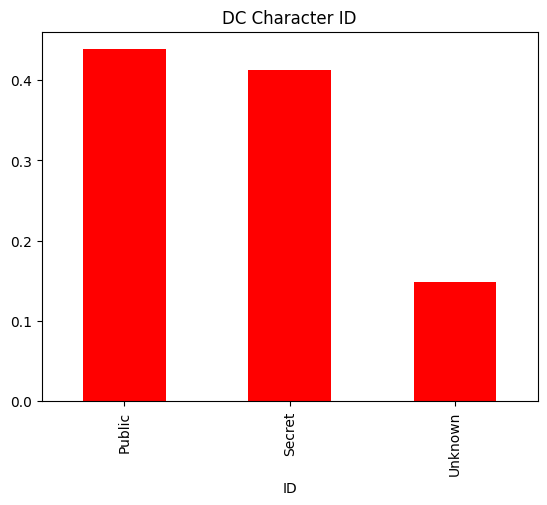

In [84]:
dc['ID'].value_counts(normalize=True).plot(kind='bar',title='DC Character ID',color='red')
plt.show()

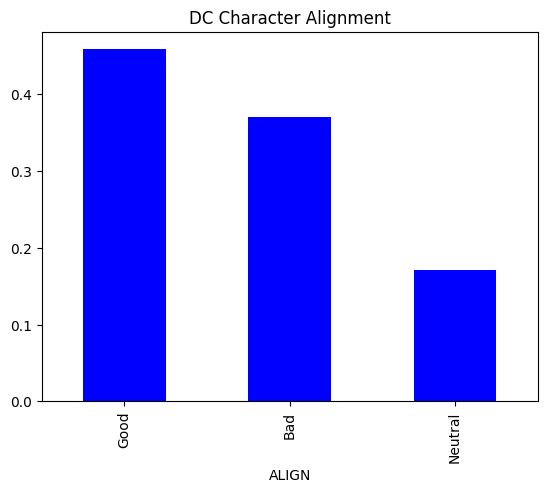

In [85]:
dc['ALIGN'].value_counts(normalize=True).plot(kind='bar',title='DC Character Alignment',color='blue')
plt.show()


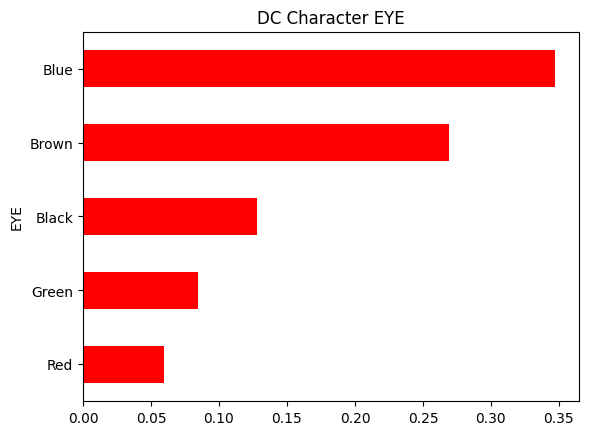

In [89]:
dc['EYE'].value_counts(normalize=True,ascending=True).tail().plot(kind='barh',title='DC Character EYE',color='red')
plt.show()


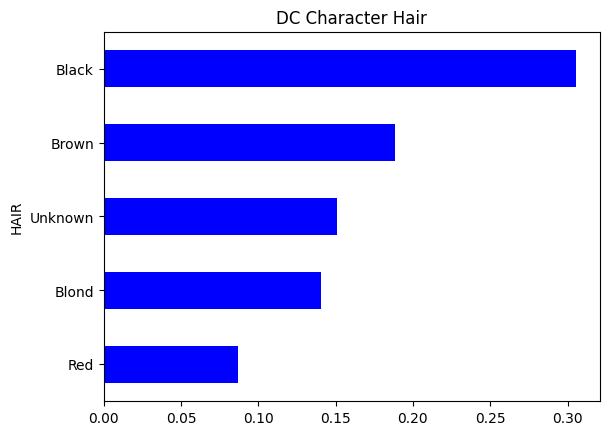

In [88]:
dc['HAIR'].value_counts(normalize=True,ascending=True).tail().plot(kind='barh',title='DC Character Hair',color='blue')
plt.show()

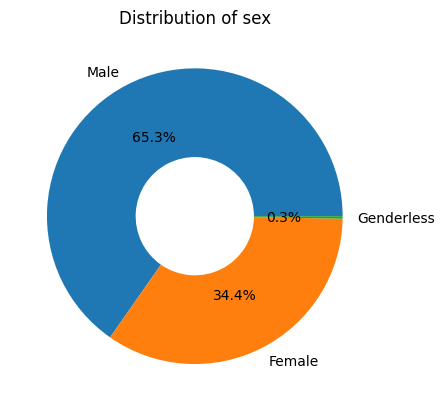

In [90]:
sex_counts = dc['SEX'].value_counts()

labels = sex_counts.index
sizes = sex_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', wedgeprops={'width': 0.6})

circle = plt.Circle((0, 0), 0.3, color='white')
plt.gca().add_artist(circle)

plt.title('Distribution of sex')
plt.show()

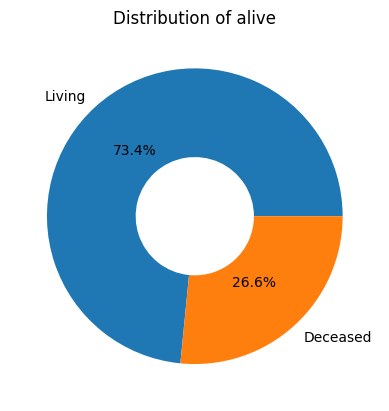

In [91]:
alive_counts = dc['ALIVE'].value_counts()

labels = alive_counts.index
sizes = alive_counts.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%', wedgeprops={'width': 0.6})

circle = plt.Circle((0, 0), 0.3, color='white')
plt.gca().add_artist(circle)

plt.title('Distribution of alive')
plt.show()

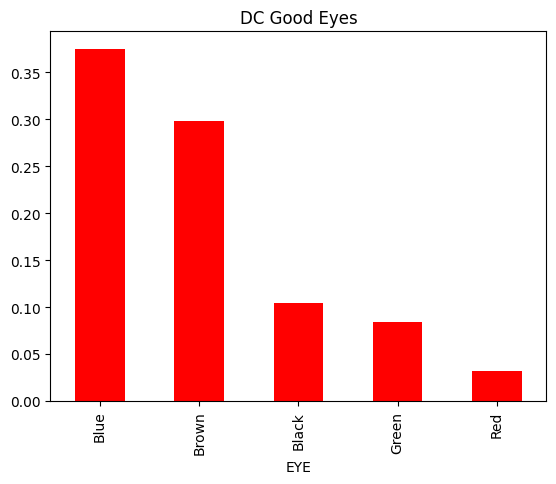

In [71]:
dc_good = dc[dc['ALIGN']=='Good']
dc_good['EYE'].value_counts(normalize=True).head(5).plot(kind='bar',title="DC Good Eyes",color='red')
plt.show()

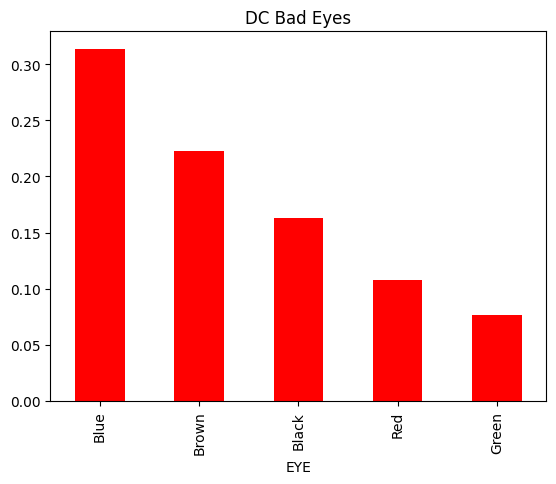

In [72]:
dc_bad = dc[dc['ALIGN']=='Bad']
dc_bad['EYE'].value_counts(normalize=True).head(5).plot(kind='bar',title="DC Bad Eyes",color='red')
plt.show()

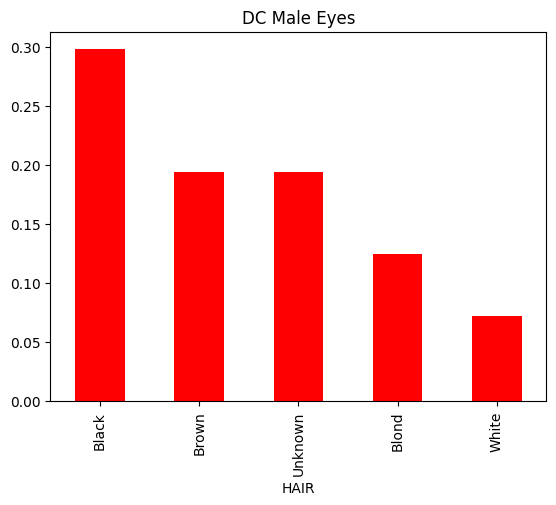

In [73]:
dc_male = dc[dc['SEX']=='Male']
dc_male['HAIR'].value_counts(normalize=True).head(5).plot(kind='bar',title="DC Male HAIR",color='red')
plt.show()

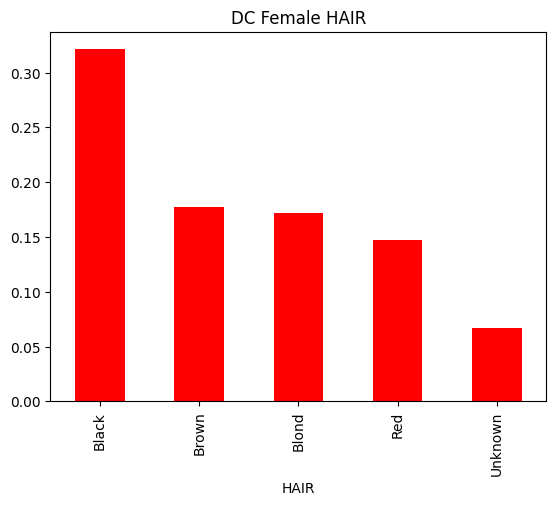

In [75]:
dc_female = dc[dc['SEX']=='Female']
dc_female['HAIR'].value_counts(normalize=True).head(5).plot(kind='bar',title="DC Female HAIR",color='red')
plt.show()

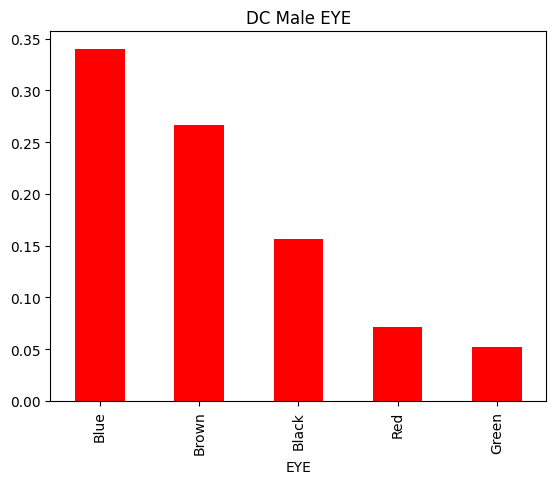

In [76]:
dc_male = dc[dc['SEX']=='Male']
dc_male['EYE'].value_counts(normalize=True).head(5).plot(kind='bar',title="DC Male EYE",color='red')
plt.show()

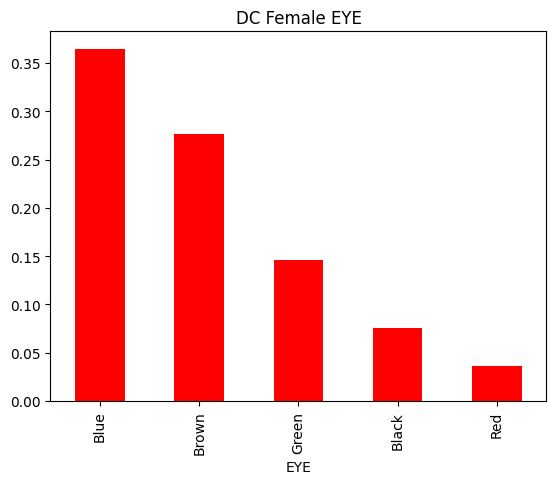

In [78]:
dc_male = dc[dc['SEX']=='Female']
dc_male['EYE'].value_counts(normalize=True).head(5).plot(kind='bar',title="DC Female EYE",color='red')
plt.show()

В целом можно сказать, что явных корреляций между типом персонажа и его внешностью нет, ТОП-2 позиций по большинству графиков сходятся, менее популярные варианты имеют различия, но небольшие.

4. Вычислим матрицу корреляции и построим heatmap для неё

Для обработки категориальных признаков воспользуемся методом Frequency Encoding, заменим значения признаков на частоту их появления в данных.



In [ ]:
# создадим копию датафрейма
dc_corr = dc.copy()

In [ ]:
# напомним список характеристик персонажа
display(dc_characteristics)

['ID', 'ALIGN', 'EYE', 'HAIR', 'SEX', 'ALIVE']

In [ ]:
# заменим данные для каждой характеристики на частоту их появления
for i in dc_characteristics:
    dc_corr[i] = dc_corr[i].map(round(dc_corr[i].value_counts()/dc_corr[i].value_counts().sum(),2))

# проверим результат
display(dc_corr)

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
0,Batman (Bruce Wayne),0.41,0.46,0.35,0.31,0.65,0.73,3093.0,1939.0,May
1,Superman (Clark Kent),0.41,0.46,0.35,0.31,0.65,0.73,2496.0,1986.0,October
2,Green Lantern (Hal Jordan),0.41,0.46,0.27,0.19,0.65,0.73,1565.0,1959.0,October
3,James Gordon (New Earth),0.44,0.46,0.27,0.06,0.65,0.73,1316.0,1987.0,February
4,Richard Grayson (New Earth),0.41,0.46,0.35,0.31,0.65,0.73,1237.0,1940.0,April
...,...,...,...,...,...,...,...,...,...,...
2951,Zirconium (New Earth),0.41,0.37,0.01,0.15,0.65,0.73,1.0,1963.0,July
2952,Boka (New Earth),0.44,0.46,0.01,0.31,0.34,0.73,1.0,1962.0,March
2953,Jeffrey Graham (New Earth),0.44,0.46,0.35,0.14,0.65,0.73,1.0,1951.0,May
2954,Green Arrow (Oliver Queen),0.41,0.46,0.08,0.14,0.65,0.73,1.0,1941.0,November


In [ ]:
# заменим данные для APPEARANCES и YEAR с помощью LabelEncoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

dc_corr.loc[:, 'APPEARANCES'] = labelencoder.fit_transform(dc_corr.loc[:, 'APPEARANCES'])
dc_corr.loc[:, 'YEAR'] = labelencoder.fit_transform(dc_corr.loc[:, 'YEAR'])
dc_corr

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
0,Batman (Bruce Wayne),0.41,0.46,0.35,0.31,0.65,0.73,279.0,4.0,May
1,Superman (Clark Kent),0.41,0.46,0.35,0.31,0.65,0.73,278.0,50.0,October
2,Green Lantern (Hal Jordan),0.41,0.46,0.27,0.19,0.65,0.73,277.0,23.0,October
3,James Gordon (New Earth),0.44,0.46,0.27,0.06,0.65,0.73,276.0,51.0,February
4,Richard Grayson (New Earth),0.41,0.46,0.35,0.31,0.65,0.73,275.0,5.0,April
...,...,...,...,...,...,...,...,...,...,...
2951,Zirconium (New Earth),0.41,0.37,0.01,0.15,0.65,0.73,0.0,27.0,July
2952,Boka (New Earth),0.44,0.46,0.01,0.31,0.34,0.73,0.0,26.0,March
2953,Jeffrey Graham (New Earth),0.44,0.46,0.35,0.14,0.65,0.73,0.0,16.0,May
2954,Green Arrow (Oliver Queen),0.41,0.46,0.08,0.14,0.65,0.73,0.0,6.0,November


In [ ]:
# заменим данные для MONTH на числовые аналоги
dc_corr['MONTH'] = pd.to_datetime(dc_corr['MONTH'], format='%B').dt.month

In [ ]:
display(dc_corr)

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
0,Batman (Bruce Wayne),0.41,0.46,0.35,0.31,0.65,0.73,279.0,4.0,5
1,Superman (Clark Kent),0.41,0.46,0.35,0.31,0.65,0.73,278.0,50.0,10
2,Green Lantern (Hal Jordan),0.41,0.46,0.27,0.19,0.65,0.73,277.0,23.0,10
3,James Gordon (New Earth),0.44,0.46,0.27,0.06,0.65,0.73,276.0,51.0,2
4,Richard Grayson (New Earth),0.41,0.46,0.35,0.31,0.65,0.73,275.0,5.0,4
...,...,...,...,...,...,...,...,...,...,...
2951,Zirconium (New Earth),0.41,0.37,0.01,0.15,0.65,0.73,0.0,27.0,7
2952,Boka (New Earth),0.44,0.46,0.01,0.31,0.34,0.73,0.0,26.0,3
2953,Jeffrey Graham (New Earth),0.44,0.46,0.35,0.14,0.65,0.73,0.0,16.0,5
2954,Green Arrow (Oliver Queen),0.41,0.46,0.08,0.14,0.65,0.73,0.0,6.0,11


Нормализуем данные для столбцов APPEARANCES, YEAR, MONTH

In [ ]:
# напишем функцию нормализации
def norm(x):
    min = x.min()
    max = x.max()
    result = (x - min)/ (max - min)
    return result

In [ ]:
# применим функцию к столбцу APPEARANCES, MONTH и YEAR и заменим значения в них, округлив до 2 знака после запятой
dc_corr[['YEAR','APPEARANCES','MONTH']] = round(dc_corr[['YEAR','APPEARANCES','MONTH']].apply(norm),2)

# проверим результат
display(dc_corr)

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
0,Batman (Bruce Wayne),0.41,0.46,0.35,0.31,0.65,0.73,1.00,0.05,0.36
1,Superman (Clark Kent),0.41,0.46,0.35,0.31,0.65,0.73,1.00,0.66,0.82
2,Green Lantern (Hal Jordan),0.41,0.46,0.27,0.19,0.65,0.73,0.99,0.30,0.82
3,James Gordon (New Earth),0.44,0.46,0.27,0.06,0.65,0.73,0.99,0.67,0.09
4,Richard Grayson (New Earth),0.41,0.46,0.35,0.31,0.65,0.73,0.99,0.07,0.27
...,...,...,...,...,...,...,...,...,...,...
2951,Zirconium (New Earth),0.41,0.37,0.01,0.15,0.65,0.73,0.00,0.36,0.55
2952,Boka (New Earth),0.44,0.46,0.01,0.31,0.34,0.73,0.00,0.34,0.18
2953,Jeffrey Graham (New Earth),0.44,0.46,0.35,0.14,0.65,0.73,0.00,0.21,0.36
2954,Green Arrow (Oliver Queen),0.41,0.46,0.08,0.14,0.65,0.73,0.00,0.08,0.91


In [ ]:
# Отбросим столбец 'name'

dc_corr.drop(columns='name', inplace=True)
dc_corr

,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
0,0.41,0.46,0.35,0.31,0.65,0.73,1.00,0.05,0.36
1,0.41,0.46,0.35,0.31,0.65,0.73,1.00,0.66,0.82
2,0.41,0.46,0.27,0.19,0.65,0.73,0.99,0.30,0.82
3,0.44,0.46,0.27,0.06,0.65,0.73,0.99,0.67,0.09
4,0.41,0.46,0.35,0.31,0.65,0.73,0.99,0.07,0.27
...,...,...,...,...,...,...,...,...,...
2951,0.41,0.37,0.01,0.15,0.65,0.73,0.00,0.36,0.55
2952,0.44,0.46,0.01,0.31,0.34,0.73,0.00,0.34,0.18
2953,0.44,0.46,0.35,0.14,0.65,0.73,0.00,0.21,0.36
2954,0.41,0.46,0.08,0.14,0.65,0.73,0.00,0.08,0.91


In [ ]:
dc_corr.corr().round(2)

,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
ID,1.00,0.06,-0.00,0.00,0.05,-0.02,0.17,-0.09,-0.04
ALIGN,0.06,1.00,0.03,-0.01,0.02,-0.02,0.07,-0.04,0.01
EYE,-0.00,0.03,1.00,0.10,-0.01,-0.03,0.09,-0.12,0.02
HAIR,0.00,-0.01,0.10,1.00,0.02,0.02,-0.01,0.04,-0.01
SEX,0.05,0.02,-0.01,0.02,1.00,-0.10,0.06,-0.17,-0.03
ALIVE,-0.02,-0.02,-0.03,0.02,-0.10,1.00,0.01,0.10,-0.01
APPEARANCES,0.17,0.07,0.09,-0.01,0.06,0.01,1.00,-0.43,-0.04
YEAR,-0.09,-0.04,-0.12,0.04,-0.17,0.10,-0.43,1.00,0.03
MONTH,-0.04,0.01,0.02,-0.01,-0.03,-0.01,-0.04,0.03,1.00


In [ ]:
dc_corr.corr().style.background_gradient(cmap='coolwarm')

,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR,MONTH
ID,1.000000,0.056004,-0.002515,0.001738,0.046685,-0.024750,0.168594,-0.087931,-0.043820
ALIGN,0.056004,1.000000,0.028189,-0.006229,0.016876,-0.021823,0.065988,-0.042918,0.011873
EYE,-0.002515,0.028189,1.000000,0.099051,-0.008257,-0.031063,0.093744,-0.121604,0.018893
HAIR,0.001738,-0.006229,0.099051,1.000000,0.015187,0.024015,-0.014939,0.036839,-0.009079
SEX,0.046685,0.016876,-0.008257,0.015187,1.000000,-0.104095,0.060229,-0.166288,-0.029228
ALIVE,-0.024750,-0.021823,-0.031063,0.024015,-0.104095,1.000000,0.012687,0.095961,-0.009811
APPEARANCES,0.168594,0.065988,0.093744,-0.014939,0.060229,0.012687,1.000000,-0.425842,-0.037285
YEAR,-0.087931,-0.042918,-0.121604,0.036839,-0.166288,0.095961,-0.425842,1.000000,0.026410
MONTH,-0.043820,0.011873,0.018893,-0.009079,-0.029228,-0.009811,-0.037285,0.026410,1.000000


Явных сильных взаимосвязей не удалось выявить. 
* Есть слабая положительная связь между публичностью личности и количеством появлений
* Есть слабая отрицательная связь между цветом глаз и годом появления (возможно цветные глаза стали популярны с годами)
* Есть слабая положительная связь между цветом глаз и волос
* Есть слабая отрицательная связь между полом персонажа и статусом Alive и Годом появления

Скорее всего, для выявления паттернов необходимо выделить другие характеристики персонажей, т.к. ввиду большое количества разных цветов, внешность большинства персонажей вписывается в 5 популярных цветов:
* для волос black, brown, unknown, blond, red (при этом unknown - это скорее нехватка данных, нежели лысые персонажи)
* для глаз blue, brown, black, green, red
* явно чаще появляются мужские персонажи
* персонажи редко умирают
* в основном новые персонажи появляются в июне


6.Перевод и вывод результата

In [2]:
# для автоматического перевода на русский язык, воспользуемся Googletrans 

import googletrans
from googletrans import Translator

In [4]:
# генерируем список словарей для будущей замены
translator = Translator()
lists_translate = []

for _ in range(len(dc_characteristics)):
        # для каждой характеристики создадим свой словарь для перевода
    for characteristic in dc_characteristics:
        # в качестве ключей используем значения характеристик
        dc_dict_keys = list(dc[characteristic].unique())
        dc_dict_values = list()
        for k in range(len(dc_dict_keys)):
          dc_dict_values.append(translator.translate(str(dc_dict_keys[k]), dest='ru').text)
        lists_translate.append({dc_dict_keys[i]: dc_dict_values[i] for i in range(len(dc_dict_keys))})

NameError: name 'dc_characteristics' is not defined

In [106]:
# к этому списку списков по индексно применить замену по словарю
list_top(dc_pop_top5)

[['Secret', 'Good', 'Blue', 'Black', 'Male', 'Living'],
 ['Secret', 'Good', 'Blue', 'Black', 'Male', 'Living'],
 ['Secret', 'Good', 'Brown', 'Brown', 'Male', 'Living'],
 ['Public', 'Good', 'Brown', 'White', 'Male', 'Living'],
 ['Secret', 'Good', 'Blue', 'Black', 'Male', 'Living']]

In [101]:
print(lists_translate[0])

{'Secret': 'Секрет', 'Public': 'Публичный', 'Unknown': 'Неизвестный'}


Планировал применить словари для вывода фразы по шаблону: мужчина с голубыми глазами и с засекреченной личностью, но при этом злодей, но после удаления последних слов характеристика, глаза, волосы и тд, словарь стал некорректно работать.